# Life Expectancy Deep Learning Model using TensorFlow
##### Roger Qiu - 12/27/2022
### Introduction
In this project, we will design, train, and evaluate a neural network model performing the task of using regression to predict the life expectancy of countries. We will build this using a Keras sequential model from the TensorFlow library. Ideally, this data will eventually inform countries concerning which factors to change in order to improve the life expectancy of their populations. If we can predict life expectancy well given all the factors, this is a good sign that there are some important patterns in the data. 

### Method
Our deep learning model uses layers of interconnected nodes that process and refine data for a prediction. These nodes follow these steps:
1. Takes values as inputs from (the dataset).
2. Weights these values.
3. Sums all the weighted values.
4. Activates when the sum exceeds a threshold (0 in our case).

Then, there is the process of backpropagation where the predictions are compared to the true targets and the loss score is used in an optimizer that adjusts the weights and biases of each of the nodes to refine and optimize the prediction. Together, forward propagation and backpropagation allow a neural network to make predictions and correct for any errors accordingly. Over time, we will visualize how our algorithm becomes gradually more accurate as our loss score decreases over every run.

### Data loading and Analysis
This dataset covers a variety of indicators for all countries from 2000 to 2015 including: immunization factors, mortality factors, economic factors, social factors, and other health-related factors. 

To begin, let's load and inspect our data from the csv file. Then let's drop any columns that are irrelevant to our analysis. Finally let's split the dataset into our features (independent variables) and labels (dependent variable).

In [1]:
# import libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.layers import InputLayer
from tensorflow.python.keras.layers import Dense
from tensorflow.python.keras.optimizer_v2.adam import Adam
import matplotlib.pyplot as plt

# load the data
df = pd.read_csv('life_expectancy.csv', encoding='latin-1')

# inspect the data
print(df.info())
print(df.head())

# drop country column, we want to learn a general pattern for all the countries, and not only those dependent on specific countries.
df = df.drop(['Country'], axis = 1)

# split life expectancy field into a separate table as labels
labels = df.iloc[:, -1]
print(labels.head())

# split the features into a separate table as features
features = df.iloc[:, 0:-1]

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          2938 non-null   object 
 1   Year                             2938 non-null   int64  
 2   Status                           2938 non-null   object 
 3   Adult Mortality                  2938 non-null   int64  
 4   infant deaths                    2938 non-null   int64  
 5   Alcohol                          2938 non-null   float64
 6   percentage expenditure           2938 non-null   float64
 7   Hepatitis B                      2938 non-null   int64  
 8   Measles                          2938 non-null   int64  
 9    BMI                             2938 non-null   float64
 10  under-five deaths                2938 non-null   int64  
 11  Polio                            2938 non-null   int64  
 12  Total expenditure   

### Data Preprocessing
Now that we have our labels and features tables, we need to split each of them into a training and testing set. We do this because a model that performs well on its training data doesn’t mean it will perform well on data it has never seen or the testing data as what we care about is the model’s performance on new data

After splitting our data, we need to our values in a way that the model understands. To do this, they need to become all numerical values then standardized on a scale of -1 to 1. Because we can’t feed lists of integers into a neural network, our tables will be turned into tensors (an array of matrices).

In [2]:
# convert categorical fields (development status) in features to numerical (binary) using one-hot-encoding
features = pd.get_dummies(features)

# view new features table
print(features.head()) # we can see 2 columns for development status now.

# split data into training and testing sets 
features_train, features_test, labels_train, labels_test = train_test_split(features, labels, test_size = 0.2, random_state=42)

# view shape of split datasets
print(f'features_train shape is: {features_train.shape}')
print(f'labels_train shape is: {labels_train.shape}')
print(f'features_test shape is: {features_test.shape}')
print(f'labels_test shape is: {labels_test.shape}')

# now we need to scale our data, begin by only selecting numerical fields, removing status, as numerical columns
numerical_features = features.select_dtypes(include=['float64', 'int64'])
numerical_columns = numerical_features.columns

# scale numerical data using standard scaler, pass through the non numerical columns
ct = ColumnTransformer([("only numeric", StandardScaler(), numerical_columns)], remainder='passthrough')

# fit the features train and features test data sets through ct to create scaled tables 
features_train_scaled = ct.fit_transform(features_train)
features_test_scaled = ct.transform(features_test)

# data set is now a tensor (or an array of matrices) and scaled form -1 to 1
print(features_train_scaled)

   Year  Adult Mortality  infant deaths  Alcohol  percentage expenditure  \
0  2015              263             62     0.01               71.279624   
1  2014              271             64     0.01               73.523582   
2  2013              268             66     0.01               73.219243   
3  2012              272             69     0.01               78.184215   
4  2011              275             71     0.01                7.097109   

   Hepatitis B  Measles    BMI   under-five deaths   Polio  ...  Diphtheria   \
0           65      1154   19.1                  83      6  ...           65   
1           62       492   18.6                  86     58  ...           62   
2           64       430   18.1                  89     62  ...           64   
3           67      2787   17.6                  93     67  ...           67   
4           68      3013   17.2                  97     68  ...           68   

    HIV/AIDS         GDP  Population   thinness  1-19 years  \

### Building the Model
Now that our data is processed and ready to be fit into the model, we are ready to create the model itself. We will build a sequential Keras model which is composed of a single stack of layers, connected sequentially. Our layers will consist of an input layer, a hidden layer and a single output node that will contain our regression prediction value. 

Our hidden layer also includes an activation function, this function simplifies the output results into values that can be binary or linear depending on the type of function. We use RELU (Rectified Linear Unit) as our activation function to transform the summed weighted input. RELU will output either the value if positive or 0 if 0 or negative. 

In [3]:
# create sequential model with Keras
my_model = Sequential()

# create input layer with shape that matches number of features (columns) in data set (21). The rows are automatically inputted.
input = InputLayer(input_shape = (features.shape[1], ))

# add the input layer to the model
my_model.add(input)

# add hidden layers that contains 64 nodes with RELU activation function
my_model.add(Dense(64, activation = 'relu'))

# add final output layer with just 1 neuron 
my_model.add(Dense(1))

# print summary of the model
print(my_model.summary())
print('This summary tells us: \n Layers and their order in the model: we have hidden layers and an output layer \n Output shape of each layer: 64 hidden layers and 1 output layer \n the parameters (weights) in each layer: 1408 for hidden layers and 65 for the output layer  \n and parameters in the total model: 1473')

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 64)                1408      
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 65        
Total params: 1,473
Trainable params: 1,473
Non-trainable params: 0
_________________________________________________________________
None
This summary tells us: 
 Layers and their order in the model: we have hidden layers and an output layer 
 Output shape of each layer: 64 hidden layers and 1 output layer 
 the parameters (weights) in each layer: 1408 for hidden layers and 65 for the output layer  
 and parameters in the total model: 1473


### Compile, fit and evaluate the model
Now that our model is built, we first need to compile all of our settings. 

We want our loss metrics to be MSE (Mean Squared Error) and MAE (Mean Absolute Error). 

Mean Squared Error is a risk function that measures how close a regression line is to a set of data points. The smaller this amount, the closer the data points are dispersed to our line of best fit.

Mean Absolute Error is the magnitude of difference between the prediction of an observation and the true value of that observation. This means that on average, the results are off with our prediction by around that many years of life expectancy.

Our optimizer is used to continuously update the weights and parameters and improve our loss metrics. In our case, we use Adam as our optimizer with a learning rate of 0.1.

After compiling we can finally train our model by fitting it with the scaled training data and the training labels. Epochs will be set to 10 so the cycle of forward and backpropagation will be run 20 times.

We will be able to see the resulting MSE and MAE after all the epochs have been run. 

We save this as 'History', which is a dictionary that contains data about everything that happened during training. We will use this data later to see it's performance over time.

In [4]:
# using adam optimizer to set learning rate of the model to .01
opt = Adam(learning_rate = 0.1)

# compile the model using MSE as loss, MAE and metrics and opt (adam) as the optimizer
my_model.compile(loss = 'mse', metrics = ['mae'], optimizer = opt)

# train model by fitting with training data, training labels, 10 epochs, 1 batch and 1 verbose.
history = my_model.fit(features_train_scaled, labels_train, epochs = 10, batch_size = 1, verbose = 1)

# evaluate the model using test data and test labels and store evaluation results and mse and mae
res_mse, res_mae = my_model.evaluate(features_test_scaled, labels_test, verbose = 0)

# check predictive performance of the model on the test set
print(f'Resulting Mean Squared Error: {round(res_mse,2)}, Resulting Mean Absolute Error: {round(res_mae,2)} years')

Epoch 1/10
2350/2350 [==============================] - 2s 729us/step - loss: 934.0381 - mae: 14.6369
Epoch 2/10
2350/2350 [==============================] - 2s 698us/step - loss: 213.3123 - mae: 7.1171
Epoch 3/10
2350/2350 [==============================] - 2s 706us/step - loss: 116.1274 - mae: 5.7613
Epoch 4/10
2350/2350 [==============================] - 2s 714us/step - loss: 168.3411 - mae: 5.4629
Epoch 5/10
2350/2350 [==============================] - 2s 733us/step - loss: 125.5048 - mae: 5.3574
Epoch 6/10
2350/2350 [==============================] - 2s 750us/step - loss: 32.5952 - mae: 4.0494
Epoch 7/10
2350/2350 [==============================] - 2s 764us/step - loss: 24.0130 - mae: 3.6213
Epoch 8/10
2350/2350 [==============================] - 2s 787us/step - loss: 25.2011 - mae: 3.7481
Epoch 9/10
2350/2350 [==============================] - 2s 802us/step - loss: 23.1290 - mae: 3.7175
Epoch 10/10
2350/2350 [==============================] - 2s 812us/step - loss: 24.8693 - mae: 

### Performance and prediction of the model
This History dictionary contains 2 entries: one per metric that was being monitored during training. Well use Matplotlib to plot the mean squared error per epoch as well as the mean-average error per epoch for. This will give an insight into how the model performs better over time.

Finally, lets use this model to make a few life expectancy predictions based on testing data that it has never seen before. We will compare these predictions with the actual targets to get an idea how close the prediction was.

dict_keys(['loss', 'mae'])


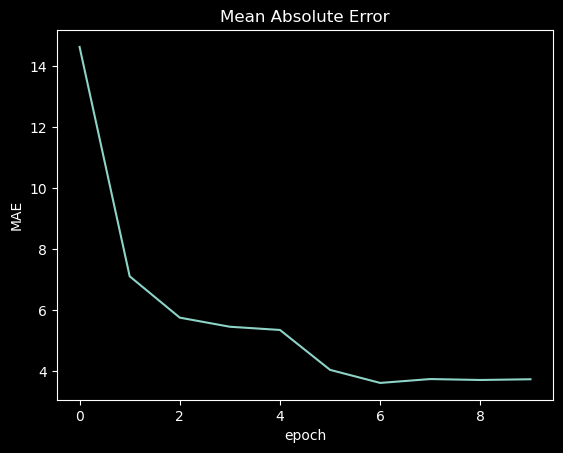

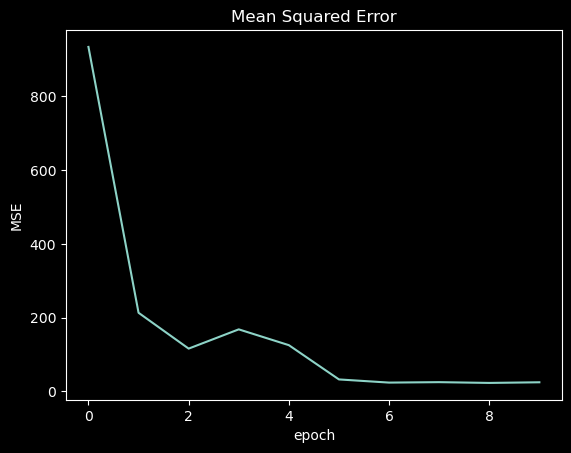

 Scaled testing set used for prediction: 
 [[-0.3334299  -0.34188905 -0.18596531 -0.91421925 -0.30625383 -0.00747402
  -0.15549147  0.49529049 -0.19681551  0.01050036 -0.88923314 -3.1367634
  -0.32041759 -0.36198552  0.19148836  0.36916681  0.33177057  0.01166804
  -0.1976551   0.          1.        ]
 [-0.3334299  -0.42186349 -0.25751384  1.86925981  0.42778927  0.38771501
  -0.20002355  0.97623163 -0.26221474  0.56838893  0.42681385  0.57139323
  -0.32041759  0.36242788 -0.19771896 -0.68101562 -0.67739751  0.73963
   0.57075657  1.          0.        ]
 [-0.11655742 -0.32589416 -0.25751384  0.11356629 -0.02151544 -3.25680611
  -0.20010986  0.9311434  -0.26221474  0.39673091  0.33963093  0.40284065
  -0.32041759 -0.04547819 -0.18505514 -0.61252546 -0.58769368  0.63563544
   0.47854717  0.          1.        ]]
 Life expectancy prediction based on the testing set: 
 [[67.311386]
 [78.19235 ]
 [73.53831 ]]
 Actual Life expectancy from the testing set: 
 2546    73.7
650     75.9
1740   

In [5]:
# print the different keys of our model that we can plot
print(history.history.keys())

plt.plot(history.history['mae'])
plt.title('Mean Absolute Error')
plt.ylabel('MAE')
plt.xlabel('epoch')
plt.show()
plt.close()

plt.plot(history.history['loss'])
plt.title('Mean Squared Error')
plt.ylabel('MSE')
plt.xlabel('epoch')
plt.show()

# set the first 3 scaled test records as test
test = features_test_scaled[:3]
print(f' Scaled testing set used for prediction: \n {test}')

# use predict function to predict results based on test
result = my_model.predict(test)
print(f' Life expectancy prediction based on the testing set: \n {result}')
print(f' Actual Life expectancy from the testing set: \n {labels_test[:3]}')

### Conclusion
In our project, we created a deep learning neural network model that Deep attempts to mimic the human brain through a combination of nodes of data inputs, weights, and bias. These all work together to recognize and classify objects within the data using multiple layers of nodes to optimize the prediction. Then, through the processes of gradient descent and backpropagation, the deep learning algorithm adjusts and fits itself for accuracy allowing it to make predictions about a life expectancy based on numerous standardized fields such as vaccinations or schooling. Models like this can eventually inform and bring insights to countries and governments ways to improve the life expectancy of their populations. 